# Redes Neuronales Densas. Introducción y modelo bicapa


## Neurona de McCulloch y Pitts

{cite:p}`McCulloch_Pitts_1943` propusieron el primer modelo de neurona artificial denominado __TLU__ (Threshold Logic Unit) o LTU (Linear Threshold Unit), unidad de umbral lineal. A esta neurona artificial también se le denomina __Perceptrón__.

El modelo parte de $n$ entradas $(x_1, x_2, ..., x_j, ..., x_n)$ a la que se aplica una ponderación lineal más un umbral (que suele denominarse sesgo o bias, $b$):

$$z=b+\displaystyle\sum_{i=1}^n w_{i}x_i$$

A la que se aplica una función de activación no lineal, que en el modelo de McCulloch y Pitts es una función escalonada del tipo 

$$a=f(z) \left \{ \begin{array}{c} 1 &  z \ge 0 \\ 0 & z <0 \end{array} \right .  $$

Resultando un modelo con salida digital o binaria. Las entradas $(x_1, x_2, ..., x_j, ..., x_n)$  equivalen a las dendritas, el parámetro $b$ se denomina umbral o bias y la salida  $a$ es el axón. Durante el entrenamiento se compara $a$ con los valores reales que se encuentran en $y$ 

<img src="images/McCulloch-Pitts.png" width="600px" align="center">

## Fundamento matemático del perceptrón simple bicapa

{cite:p}`rosenblatt1958perceptron` introdujo el __perceptrón simple__ formado por dos capas, una de __entrada con n neuronas__ y una de __salida con m neuronas__. {cite:p}`widrow1960adaptive` introdujeron el modelo __ADAptative LInear Neuron (Adaline)__ tambien bicapa. 

### Activación de una observación $\bar{x}$ por efecto de la red

Dada __1 observación__ $\bar{x}=(x_1,...,x_j, ..., x_n)$ de la que se conoce su __clase__ en formato _one-hote_ $\bar{y}=(y_1,...,y_i, ...y_m)$ 

Primero se efectua una __ponderación lineal__ $\bar{z}=(z_1,...,z_i, ..., z_m)$ de la que se obtiene la __salida__ $\bar{a}$ aplicando una __función de activación__: 

$$\bar{a}=f(\bar{z})=(a_1,...,a_i, ..., a_m)$$

Se puede decir que existen $n$ __neuronas de entrada__ y $m$ __neuronas de salida__. La ponderación lineal en las neuronas de salida a partir de los pesos se calcula:

$$z_i = b_i + \displaystyle\sum_{j=1}^n w_{ij}x_j \quad (i=1...m)$$

Hacen falta $n \times m$ pesos y $m$ bias para definir la red, que puesto en forma matricial:

$$ W = \begin{bmatrix}{w_{11}}&{w_{12}}&{...}&{w_{1m}}\\{w_{21}}&{w_{22}}&{...}&{w_{2m}}\\{...}&{...}&{...}&{...}\\{w_{n1}}&{w_{n2}}&{...}&{w_{nm}}\end{bmatrix}  \quad B = \begin{bmatrix}{b_{1}}&{b_{2}}&{...}&{b_{m}}\end{bmatrix} $$

__Siendo__

$$ \bar{z} = \bar{x} \cdot W + B $$ 

___

<img src="images/Neurona-2Capas.png" width="800px" align="center">

___

### Entrenamiento que produce en la red una observación $\bar{x}$

Se supone el siguiente __ejemplo sencillo__ de red bicapa

<img src="images/RedBiCapa.png" width="400px" align="center">

La red se puede configurar con las __matrices de pesos y bias__ siguientes:

$$W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22}  \\ w_{31} & w_{32} \end{bmatrix}  \phantom{abc}  B = \begin{bmatrix} b_1 & b_2 \end{bmatrix} $$

Se conoce __una observación__ $\bar{x}=(x_1, x_2, x_3)$ de la que se sabe su __clase en formato one-hot__ $\bar{y}=(y_1, y_2)$. Una vez __activada__ la red se obtiene $\bar{a}=(a_1, a_2)$. Usando el error al cuadrado, la __pérdida__ de esta observación será:

$$C = \frac{1}{2} \begin{bmatrix} (a_1-y_1)^2 + (a_2-y_2)^2 \end{bmatrix}$$

Se sabe que:

$$\begin{cases} z_1 = w_{11} x_1 + w_{12} x_2 + w_{13} x_3 + b_1  \\ z_2  = w_{21} x_1 + w_{22} x_2 + w_{23} x_3 + b_2 \end{cases} 
\rightarrow \begin{cases} a_1 = f(z_1) \\ a_2 = f(z_2) \end{cases}  $$

La __tasa de variación de la función de pérdida__ con respecto al peso $w_{11}$ afecta a la __primera neurona de salida__, por lo tanto se calcula aplicando la regla de la cadena así:

$$\frac{\partial{C}}{\partial{w_{11}}} = \frac{\partial{C}}{\partial{a_1}} \frac{\partial{a_1}}{\partial{z_1}}  \frac{\partial{z_1}}{\partial{w_{11}}} $$

Por tanto

$$\frac{\partial{C}}{\partial{w_{11}}} = (a_1 - y_1) f'(z_1) x_1$$

Llamando $\delta_1 = (a_1 - y_1) f'(z_1)$ __las tasas de variación__ respecto a la configuración que aplica sobre $z_1$ es:

 $$ \frac{\partial{C}}{\partial{w_{11}}} = \delta_1 x_1; \phantom{abc} \frac{\partial{C}}{\partial{w_{12}}} = \delta_1 x_2; 
      \phantom{abc} \frac{\partial{C}}{\partial{w_{13}}} = \delta_1 x_3; \phantom{abc} \frac{\partial{C}}{\partial{b_1}} = \delta_1$$

__Repitiendo el proceso__ con respecto al peso $w_{21}$ afecta a la __segunda neurona de salida__ (término $a_2$):

$$\frac{\partial{C}}{\partial{w_{21}}} = \frac{\partial{C}}{\partial{a_2}} \frac{\partial{a_2}}{\partial{z_2}}  \frac{\partial{z_2}}{\partial{w_{21}}} $$
$$\frac{\partial{C}}{\partial{w_{21}}} = (a_2 - y_2) f'(z_2) x_1$$

Llamando $\delta_2 = (a_2 - y_2) f'(z_2)$ __las tasas de variación__ respecto a la configuración que aplica sobre $z_2$ es:

 $$ \frac{\partial{C}}{\partial{w_{21}}} = \delta_2 x_1; \phantom{abc} \frac{\partial{C}}{\partial{w_{22}}} = \delta_2 x_2; 
      \phantom{abc} \frac{\partial{C}}{\partial{w_{23}}} = \delta_2 x_3; \phantom{abc} \frac{\partial{C}}{\partial{b_2}} = \delta_2$$


__El gradiente__ que optimiza la configuración de la red por el impacto de la observación $\bar{x}$ será:

$$ \frac{\partial{C}}{\partial{W}}  = 
    \begin{bmatrix}  
    \frac{\partial{C}}{\partial{w_{11}}} & \frac{\partial{C}}{\partial{w_{12}}} \\
    \frac{\partial{C}}{\partial{w_{21}}} & \frac{\partial{C}}{\partial{w_{22}}} \\
    \frac{\partial{C}}{\partial{w_{31}}} & \frac{\partial{C}}{\partial{w_{32}}} 
    \end{bmatrix} =
    \begin{bmatrix} \delta_1 x_1 & \delta_2 x_1  \\
                    \delta_1 x_2 & \delta_2 x_2 \\
                    \delta_1 x_3 & \delta_2 x_3  \end{bmatrix} = 
    \begin{bmatrix} \delta_1 & \delta_2  \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3  \end{bmatrix}   
    =  \bar{\delta}  \cdot \begin{pmatrix}\bar{x} \end{pmatrix} ^T
$$

Y __también__

$$ \frac{\partial{C}}{\partial{B}} = \begin{bmatrix}  \frac{\partial{C}}{\partial{b_1}}  &  \frac{\partial{C}}{\partial{b_2}}   \end{bmatrix} = 
\begin{bmatrix} \delta_1 & \delta_2 \end{bmatrix} = \bar{\delta} $$ 

__Además__ $\bar{\delta}$ se puede poner vectorialmente:

$$\bar{\delta} = (\delta_1, \delta_2) = \begin{pmatrix} (a_1 - y_1)f'(z_1), (a_2 - y_2)f'(z_2) \end{pmatrix}$$

De la que se obtiene la __expresión final__:

$$\bar{\delta} = (\bar{a} - \bar{y}) \odot f'(\bar{z})$$

Donde $\bar{a} - \bar{y}$ es el __error neto__ y $\odot$ es el __producto de hadamard__ que obtiene a partir de 2 vectores un nuevo vector donde sus compenentes son el producto componente a componente.

__Indicar como comentario final__ que además los gradientes $ \frac{\partial{C}}{\partial{W}}$ y $ \frac{\partial{C}}{\partial{B}}$ que optimizan la configuración de la red, se tiene que $\bar{\delta}$ es un gradiente intermedio de $C$ con respecto a $\bar{z}$. Efectivamente:

$$\bar{\delta}=(\delta_1, \delta_2) = (\frac{\partial{C}}{\partial{z_1}}, \frac{\partial{C}}{\partial{z_2}}) = \frac{\partial{C}}{\partial{\bar{z}}} $$


<h3 style="color:blue;">Resumen del entrenamiento de 1 observación</h3>

$$  W[t+1] = W[t] - \eta \cdot    \begin{pmatrix} \bar{\delta} \end{pmatrix} ^T \cdot \bar{x} $$
$$  B[t+1] = B[t] - \eta  \cdot \begin{pmatrix} \bar{\delta} \end{pmatrix} ^T  $$

<h4 style="color:green;">Gradientes asociados</h4>

$$\frac{\partial C}{\partial W}=\begin{pmatrix} \bar{\delta} \end{pmatrix} ^T \cdot \bar{x};   \phantom{abc}  \frac{\partial C}{\partial B}=\begin{pmatrix} \bar{\delta} \end{pmatrix} ^T ;  \phantom{abc} \frac{\partial C}{\partial Z}=\begin{pmatrix} \bar{\delta} \end{pmatrix} ^T  $$


### Resolución matricial, proceso en bloque

__Proceso hacia adelante o forward__: dada una matriz ${\large X}$ de __N__ registros que entran a la neurona y dados unos pesos y bias definidos en las matrices ${\large W}$ y ${\large B}$, se tendrá la siguiente salida de forma matricial:

$$ \bar{z} = \bar{x} \cdot W + B $$ 

$$Z = X \cdot W \oplus B$$

Siendo $\oplus$ como una operación _sobrecargada_ que suma $b_i$ a cada columna de la matriz resultante del producto $X \cdot W^T$

La salida activada $A$ se obtiene aplicando la función de activación a la matriz $Z$:

$$A = f (Z)$$

El error neto entre los valores reales ${\large Y}$ y los activados en el paso anterior de la neurona vendrán dados por

$$A - Y$$

__Matriz ${\large \Delta}$__: La tasa de variación del error cuadrático por unidad de entrada (o por unidad de activación):

$$\Delta = (A-Y) \odot f ' (Z)$$

En la obtención de la matriz ${\large \Delta}$ se utiliza el producto de Hadamard ($\odot$).

Por tanto se puede decir que:

$$\Delta = \frac{\partial C}{\partial Z}$$

<h3 style="color:blue;">Resumen del entrenamiento de un bloque de observaciones</h3>
Es posible entrenar el perceptrón en T etapas, partiendo de valores aleatorios en las matrices  $W$ y $B$ en $t=1$, de forma que estas matrices en sucesivos ${\large t}$ adoptarán:

$$W(t+1) = W(t) - \eta  \Delta^T \cdot X $$
$$B(t+1) = B(t) - \eta \Delta ^T \cdot {\large 1}$$
Siendo ${\large 1}$ una matriz columna de $N$ __unos__ que realiza el sumatorio de las filas de $\Delta ^T$

<h4 style="color:green;">Gradientes asociados</h4>

$$\frac{\partial C}{\partial W}=\Delta ^T \cdot X; \phantom{abc}; \frac{\partial C}{\partial B}=\Delta ^T \cdot {\large 1};
\phantom{abc} \frac{\partial C}{\partial Z} = \Delta $$

### Comentarios

La matriz ${\large X}$ tiene dimensiones __(N,n)__: $N$ filas (observaciones) de $n$ características cada una.

Las matrices ${\large Z, A, \Delta}$ tiene dimensiones __(N,m)__, tantas filas como las observaciones del conjunto de entrenamiento y tantas columnas como neuronas de salida $m$. El número de __neuronas de salida__ coincide con el __número de clases__. 

Una de las funciones de activación primeras que se usaron fuero la sigmoidea o lógistica 

$$f(z)=\sigma(z)=\frac{1}{1+e^{-z}}$$

El __gradiente descenso__ se basa en que el __vector gradiente__ define en el dominio de una función de varias variables $f(\bar{x})$ la dirección de máximo incremento de la pendiente. De forma que se toma __signo negativo__ para ir hacia un mínimo local y un valor de magnitud reducida $\eta$ que evite saltar el mínimo por un avance excesivo.

Así partiendo de un valor aleatorio $\bar{x} = \bar{x}_0$ se busca el mínimo local a través de sucesivas iteraciones:

$$\bar{x}_{k+1} = \bar{x}_{k} - \eta \nabla f(\bar{x}_{k})$$


<img src="images/gradiente-descenso.png" width="400px" align="center">

## Implementación del modelo bicapa en sk-learn

El modelo bicapa se encuentra implementado en la clase __sklearn.linear_model.Perceptron__. 

En el __constructor__ de la clase, por ejemplo, se encuentran los siguientes __parámetros__:

- __alpha__ : ratio de aprendizaje (por defecto 0.0001).
- __fit_intercept__ : (por defecto=True). Indica si se debe calcular el bias o ha de ser cero (datos centrados).
- __max_iter__ : (por defecto=1000). Número de épocas.
- __random_state__: (por defecto=None). Semilla random.
- __tol__: (por defecto 1e-3). Criterio de parada. Si no es None termina cuando __coste - coste_previo < tol__.

Algunos de las __propiedades__ que se pueden consultar una vez creado el objeto con el constructor y realizado el ajuste son:

- <b>coef_</b>, <b>intercept_</b>: pesos y bias.

Y los __métodos__ más importantes son:

- <b>fit</b>(X, y) : realiza el ajuste.
- <b>predict</b>(X): realiza la predicción
- <b>score</b>(X, y) : devuelve la exactitud o accuracy.


### Se aplica el Perceptron simple o bicapa al conjunto IRIS

El conjunto __Iris__ tiene 2 características que permiten una representación 2D, se copian sólo ellas al conjunto X para poder comprobar que el __perceptron bicapa separa linealmente las clases__.

In [39]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
X, y = df.values[:,2:4], df.values[:,4]

### Entrenar y representar el conjunto 

En este caso, y como excepción, __se entrena todo el conjunto X__ sin dividir en entrenamiento y pruebas.

In [45]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=None, max_iter=300, alpha=0.001, random_state=1)
clf.fit(X,y)
print('Tasa de acierto (accuracy) = ', 100*clf.score(X,y))

Tasa de acierto (accuracy) =  76.0


In [46]:
# Dado b_i + w_i1*x + w_i2*y = 0
# y = (-1/w_i2) * (b_i + w_i1*x)
def getOrdenadaRecta(matW, matB, iNeur, max_XY, x):
    z_max_XY = matB[iNeur] + matW[iNeur,0]*max_XY[0] + matW[iNeur,1]*max_XY[1]
    sentidoRecta = '+' if z_max_XY >= 0 else '-' 
    return (-1/matW[iNeur,1])*(matB[iNeur] + matW[iNeur,0]*x), sentidoRecta

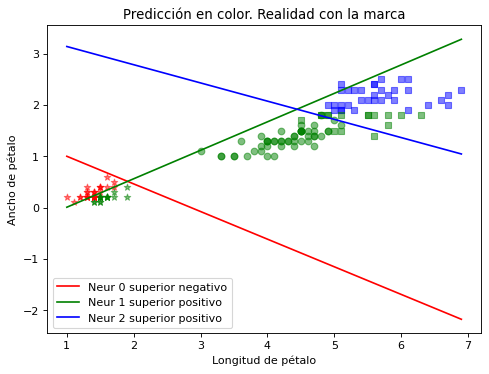

In [47]:
import matplotlib.pyplot as plt
y_pred = clf.predict(X)
marcas = ['*', 'o', 's']
clases=iris['target_names']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
lst_x = np.linspace(min(X[:,0]), max(X[:,0]), 50)
max_XY = (max(X[:,0]), max(X[:,1]))
for i in range(len(X)):
    ik = int(y_pred[i])
    ic = int(y[i])
    plt.scatter(X[i,0], X[i,1], c=color[ik], alpha=0.5, marker=marcas[ic])
## Se grafican las 3 rectas delimitadoras
for iNeur in range(3):
    lst_y, sentido = getOrdenadaRecta(clf.coef_, clf.intercept_, iNeur, max_XY, lst_x)
    etiqueta = "Neur " + str(iNeur) + " superior positivo" if sentido == '+' else "Neur " + str(iNeur) + " superior negativo"
    plt.plot(lst_x, lst_y, c=color[iNeur], label=etiqueta)
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.title("Predicción en color. Realidad con la marca")
plt.legend()
plt.show()

Se observa que las 3 clases que son __linealmente separables__.   

La recta contiene aquellas observaciones (longitud pétalo, ancho pétalo) que tienen $z=0$ en cada una de las neuronas. __La recta siempre va a delimitar a un lado los puntos positivos respecto de su ecuación en $z$ y a otro los negativos__. Pueden estar los positivos en la parte superior o inferior, como se indica en la leyenda. Esto depende de la ecuación del plano en 3D.

Por ejemplo la ecuación $z = x + y$ tiene como recta frontera $y=-x$, También $z = -x - y$ tiene la misma recta frontera al cortar con $z=0$. En 3D ambos son planos que cortan la misma recta pero su posición en el espacio es distinta. Eso hace que la primera tenga los puntos superiores positivos y la otra negativos.

## Funciones de activación

Echemos un vistazo a las funciones de activación más importantes

In [39]:
def sigmoid(x):
    #return 1.0/(1.0 + np.exp(-x))  ## versión básica con problemas de desbordamiento en valores x<<<0
    #return np.where(x < 0, np.exp(x)/(1.0 + np.exp(x)), 1.0/(1.0 + np.exp(-x)))
    #return 1. / (1. + np.exp(-np.clip(x, -250, 250)))
    from scipy.special import expit
    return expit(x)  ##Función sigmoidea de scipy; algo más lenta
 
def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - np.tanh(x)**2

def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivada(x):
    return np.where(x <= 0, 0, 1)

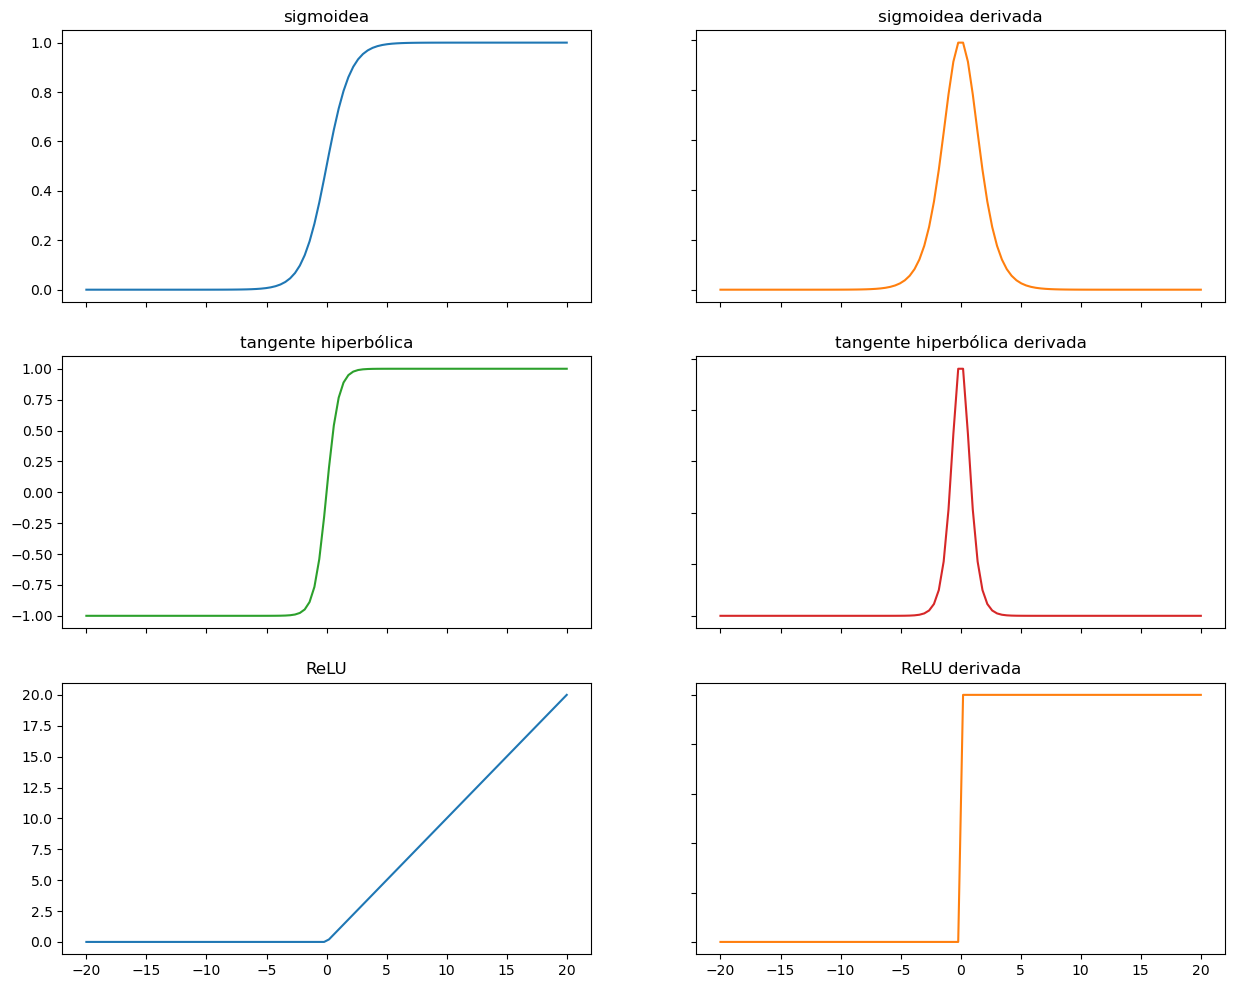

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12))
x = np.linspace(-20, 20, 100)
axs[0][0].plot(x, sigmoid(x))
axs[0][0].set_title("sigmoidea")
axs[0][1].plot(x, sigmoid_derivada(x), 'tab:orange')
axs[0][1].set_title("sigmoidea derivada")
axs[1][0].plot(x, tanh(x), 'tab:green')
axs[1][0].set_title("tangente hiperbólica")
axs[1][1].plot(x, tanh_derivada(x), 'tab:red')
axs[1][1].set_title("tangente hiperbólica derivada")
axs[2][0].plot(x, ReLU(x))
axs[2][0].set_title("ReLU")
axs[2][1].plot(x, ReLU_derivada(x), 'tab:orange')
axs[2][1].set_title("ReLU derivada")

for ax in fig.get_axes():
    ax.label_outer()